In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test= pd.read_csv('/content/drive/MyDrive/test.csv')


In [6]:
print ("Taille des données d'entraînement:", train.shape)
print ("Taille des données de test:", test.shape)

Taille des données d'entraînement: (1460, 81)
Taille des données de test: (1459, 80)


In [7]:
train.head() #visualisation des 5 premières colonnes du tableau

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

La distribution des prix de vente des maisons est large avec une médiane de 163,000 USD et une asymétrie vers des prix plus élevés.

In [9]:
from scipy.stats import skew
# Calculer le coefficient d'asymétrie
skewness = skew(train['SalePrice'])

print(f"Le coefficient d'asymétrie des prix de vente est : {skewness}")


Le coefficient d'asymétrie des prix de vente est : 1.880940746034036


La distribution des prix de vente des maisons présente une asymétrie positive significative (skewness de 1.8809), indiquant la présence de maisons avec des prix de vente beaucoup plus élevés que la moyenne.

In [10]:
#Transformation logarithmique de train.SalePrice
train['Log_SalePrice'] = np.log(train['SalePrice'])

In [11]:
#Recalculer le coefficient d'asymétrie après transformation
log_skewness = skew(train['Log_SalePrice'])

print(f"Le coefficient d'asymétrie des prix de vente après transformation logarithmique est : {log_skewness}")


Le coefficient d'asymétrie des prix de vente après transformation logarithmique est : 0.1212103673013655


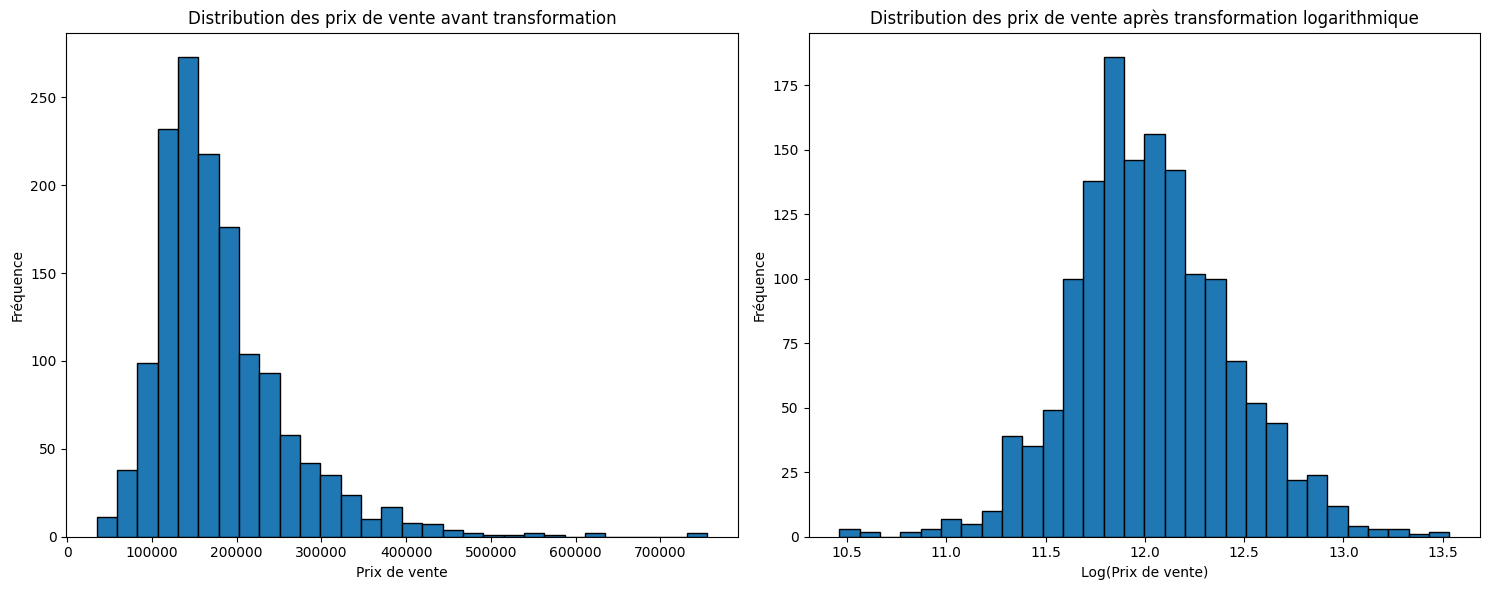

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogramme avant transformation
axs[0].hist(train['SalePrice'], bins=30, edgecolor='k')
axs[0].set_title('Distribution des prix de vente avant transformation')
axs[0].set_xlabel('Prix de vente')
axs[0].set_ylabel('Fréquence')

# Histogramme après transformation logarithmique
axs[1].hist(train['Log_SalePrice'], bins=30, edgecolor='k')
axs[1].set_title('Distribution des prix de vente après transformation logarithmique')
axs[1].set_xlabel('Log(Prix de vente)')
axs[1].set_ylabel('Fréquence')

# Ajuster les espaces entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


In [13]:
numeric_features = train.select_dtypes(include=[np.number])

In [14]:
# Calcule des corrélations entre SalePrice et les autres variables
corr = numeric_features.corr()

In [15]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice        1.000000
Log_SalePrice    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [16]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [17]:
# Créer un tableau croisé dynamique pour analyser la relation entre OverallQual et SalePrice
pivot_table = pd.pivot_table(train, values='SalePrice', index='OverallQual', aggfunc='mean')

# Afficher le tableau croisé dynamique
print(pivot_table)


                 SalePrice
OverallQual               
1             50150.000000
2             51770.333333
3             87473.750000
4            108420.655172
5            133523.347607
6            161603.034759
7            207716.423197
8            274735.535714
9            367513.023256
10           438588.388889


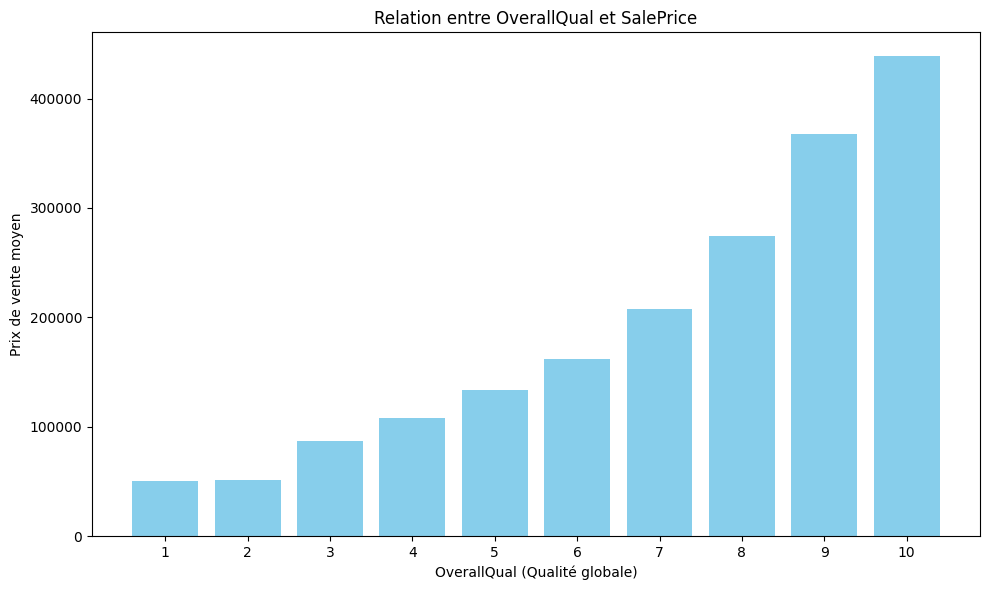

In [18]:
#Visualisation du tableau dynamique a l'aide d'un graphique en bar
plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index, pivot_table['SalePrice'], color='skyblue')
plt.title('Relation entre OverallQual et SalePrice')
plt.xlabel('OverallQual (Qualité globale)')
plt.ylabel('Prix de vente moyen')
plt.xticks(pivot_table.index)
plt.tight_layout()
plt.show()


le prix de vente augmente strictement avec la qualité globale

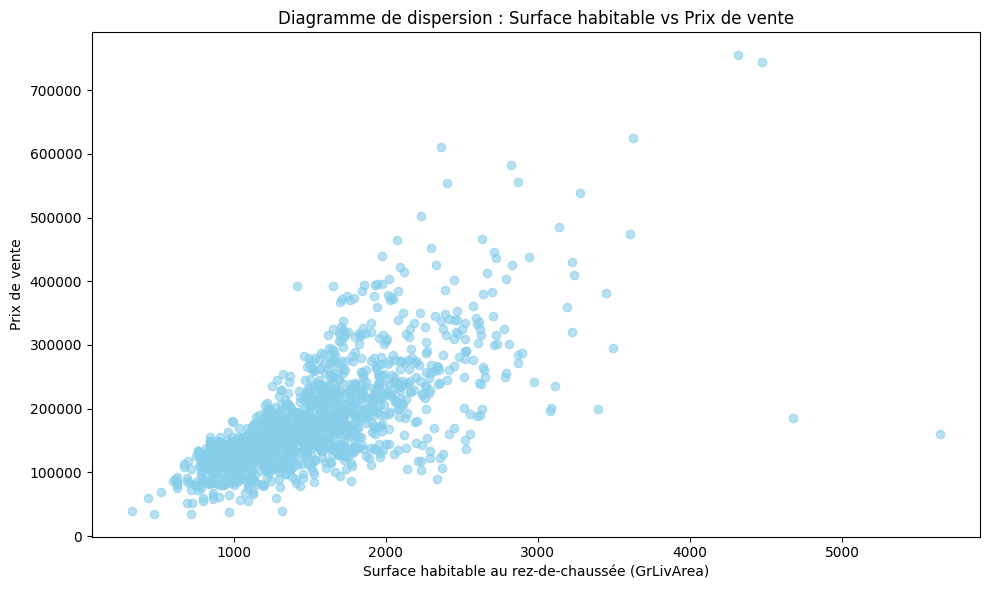

In [19]:
# Diagramme de dispersion entre Ground Living Area GrLivArea et SalePrice
plt.figure(figsize=(10, 6))
# Tracer le diagramme de dispersion
plt.scatter(train['GrLivArea'], train['SalePrice'], color='skyblue', alpha=0.6)
plt.title('Diagramme de dispersion : Surface habitable vs Prix de vente')
plt.xlabel('Surface habitable au rez-de-chaussée (GrLivArea)')
plt.ylabel('Prix de vente')
plt.tight_layout()
plt.show()


 l’augmentation de la surface habitable correspond à une augmentation au niveau du prix.

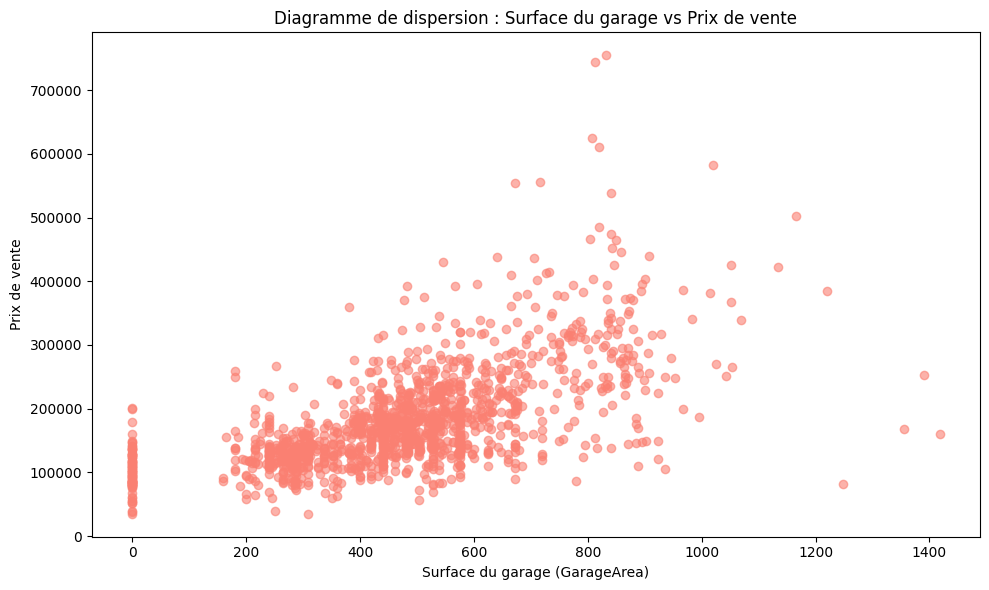

In [20]:
# Diagramme de dispersion entre Garage Area et SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(train['GarageArea'], train['SalePrice'], color='salmon', alpha=0.6)
plt.title('Diagramme de dispersion : Surface du garage vs Prix de vente')
plt.xlabel('Surface du garage (GarageArea)')
plt.ylabel('Prix de vente')
plt.tight_layout()
plt.show()


Le diagramme de dispersion montre qu'il y a beaucoup de maisons avec une valeur de 0 pour la surface du garage (GarageArea) ce qui indique qu'elles n'ont pas de garage

In [21]:
train = train[train['GarageArea'] < 1200]

In [22]:
# Gestion des valeurs nulles
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
MasVnrType,871
FireplaceQu,689
LotFrontage,258
GarageType,81
GarageYrBlt,81


In [23]:
# Remplacer les valeurs nulles par la moyenne pour les caractéristiques numériques
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace=True)

# Remplacer les valeurs nulles par le mode pour les caractéristiques catégorielles
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)

# Vérifier à nouveau les valeurs nulles pour s'assurer qu'elles ont été traitées
print(train.isnull().sum().sort_values(ascending=False)[:25])


PoolQC          1449
MiscFeature     1402
Alley           1364
Fence           1174
FireplaceQu      689
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
KitchenAbvGr       0
Fireplaces         0
KitchenQual        0
BedroomAbvGr       0
HalfBath           0
FullBath           0
TotRmsAbvGrd       0
Functional         0
BsmtHalfBath       0
BsmtFullBath       0
dtype: int64


In [24]:
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train.drop(columns=columns_to_drop, inplace=True)
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace=True)

categorical_columns = ['MasVnrType', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for column in categorical_columns:
    train[column].fillna(train[column].mode()[0], inplace=True)

# Vérifier à nouveau les valeurs nulles
print(train.isnull().sum().sort_values(ascending=False))


Id               0
HalfBath         0
GarageType       0
Fireplaces       0
Functional       0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
Log_SalePrice    0
Length: 77, dtype: int64


In [28]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,...,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1147,1450,921,1309,1454,1048,1378,225,1257,1441,...,1330,733,1355,948,686,1387,1402,1335,1266,1196


In [29]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Street
Pave    1450
Grvl       5
Name: count, dtype: int64 



 la majorité des maisons ont des rues pavées, tandis qu'un très petit nombre ont des rues en gravier.

In [32]:
# Encodage one-hot avec conversion en entier
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True).astype(int)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True).astype(int)
print('Encoded:\n')
print(train.enc_street.value_counts())

Encoded:

enc_street
1    1450
0       5
Name: count, dtype: int64


In [33]:
import pandas as pd
# Création du tableau croisé dynamique
pivot_table = pd.pivot_table(train, values='SalePrice', index='SaleCondition', aggfunc='mean')

print("Tableau croisé dynamique entre SaleCondition et SalePrice:")
print(pivot_table)


Tableau croisé dynamique entre SaleCondition et SalePrice:
                   SalePrice
SaleCondition               
Abnorml        146526.623762
AdjLand        104125.000000
Alloca         167377.416667
Family         149600.000000
Normal         175287.005853
Partial        272444.065574


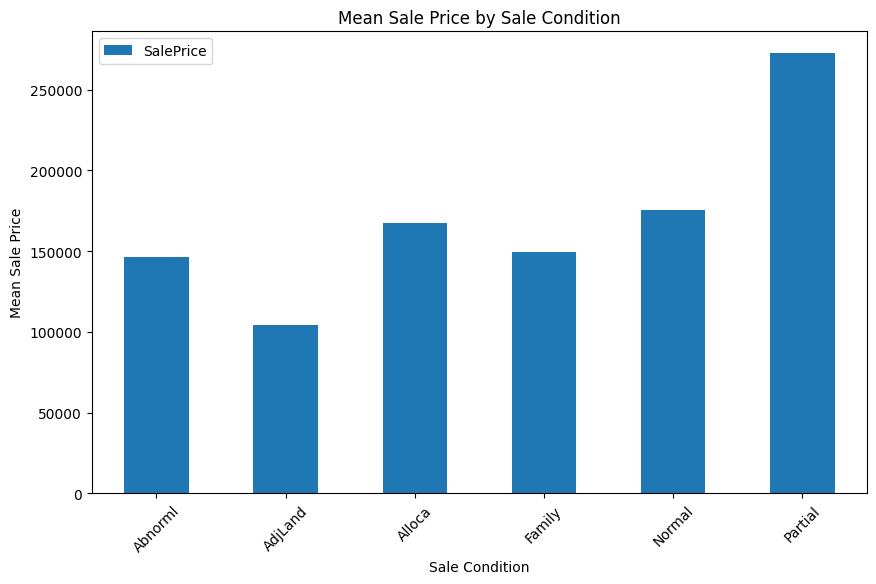

In [34]:
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Sale Price by Sale Condition')
plt.xlabel('Sale Condition')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=45)
plt.show()


Partial a un prix de vente plus élevé que les autres

In [35]:
# Création de la nouvelle colonne encodée
train['enc_salecondition'] = train['SaleCondition'].apply(lambda x: 1 if x == 'Partial' else 0)
print(train)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... PoolArea MiscVal MoSold YrSold  \
0            Lvl    AllPub    Inside  ...      

In [36]:
#Traitement des données manquantes en les remplaçant pour la moyenne
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [37]:
sum(data.isnull().sum() != 0)

0

In [38]:
#Construction d'un modèle linéaire
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [43]:
from sklearn.linear_model import LinearRegression
reggresser=LinearRegression()
reggresser.fit(X_train,y_train)

LinearRegression()

In [46]:
print ("R^2: \n", reggresser.score(X_test, y_test))

R^2: 
 1.0


In [49]:
predictions = reggresser.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error
print ('Le RMSE est: \n', mean_squared_error(y_test, predictions))

Le RMSE est: 
 2.4863058883888854e-30


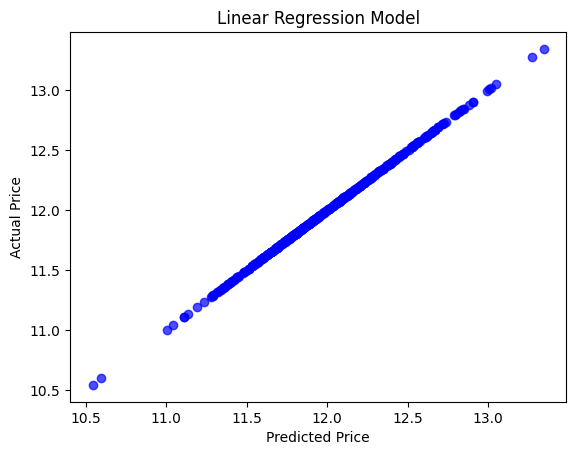

In [53]:
actual_values = y_test
plt.scatter(predictions, actual_values,alpha=.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

les valeurs prédites par le modèle correspondent exactement aux valeurs réelles